## Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, <B>the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers</B>. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, <B>the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster</B>. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

 

## Objective

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Key Questions:

- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?

## Data Description: 

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

**Importing necessary libraries**

In [189]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

#Libraries for KMeans clustering
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

#Library for Scaling the data
from sklearn.preprocessing import StandardScaler


#Libraries for Hierarchial clustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.cluster import AgglomerativeClustering 

#Libraries to compare clusters
from sklearn.metrics import silhouette_score

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer





In [49]:
# Load data from excel
data = pd.read_excel("Credit Card Customer Data.xlsx")  

In [50]:
# displays the head of the pandas df
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [51]:
#show column datatypes for pandas df
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [52]:
# display pandas dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Insights**
- No missing values
- There are 660 rows and 6 columns
- All are integer datatypes
- Looks like data is clean with no special characters or type errors.

In [53]:
# gives description information like mean, min,max,count , quantiles
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


**Insights**

- Mean of Avg_Credit_Limit is 18000, max is 200000, min is 3000.
- Customers have max of 10 , min of 1 total credit cards.
- It looks like Total_visits_online is left skewed. mean is very less.
- Total_visits_online are more than Total_visits_bank
- Max Total_calls_made is 10 and mean is 3. 

In [54]:
# take backup of original data 
data_backup= data.copy()

In [55]:
# check duplicate observations
data_backup.duplicated().sum() # no duplicates in the dataframe


0

## EDA

### Univariant Graphs 

**Histplots**

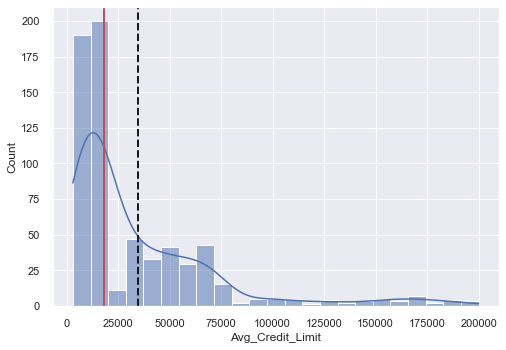

In [56]:
# Histplot for data['Avg_Credit_Limit'] column

result = sns.histplot(data['Avg_Credit_Limit'],kde=True)
plt.axvline(data['Avg_Credit_Limit'].mean(), color='k', linestyle='dashed', linewidth=2)  # display mean on graph
plt.axvline(data['Avg_Credit_Limit'].median(), color='r', linestyle='-', linewidth=2) # display median on graph

**Insights**

- Avg_Credit_Limit distribution is left skewed.
- Majority of customers - the Avg_Credit_Limit is <25000

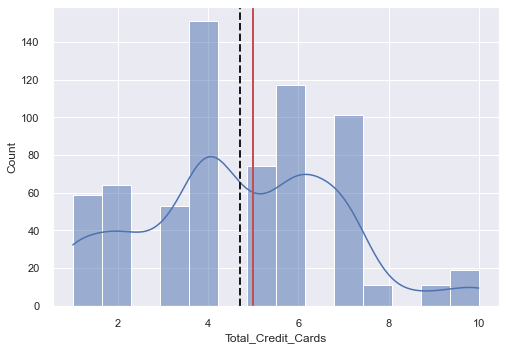

In [57]:
# Histplot for data['Total_Credit_Cards'] column

result = sns.histplot(data['Total_Credit_Cards'],kde=True)
plt.axvline(data['Total_Credit_Cards'].mean(), color='k', linestyle='dashed', linewidth=2)  # display mean on graph
plt.axvline(data['Total_Credit_Cards'].median(), color='r', linestyle='-', linewidth=2)# display median on graph

**Insights**

- Majority of customers have 4-6 credit cards.
- There are two peaks in the graphs which shows minimum of two clusters or groups in data.
- There are very less customers with credit cards >8

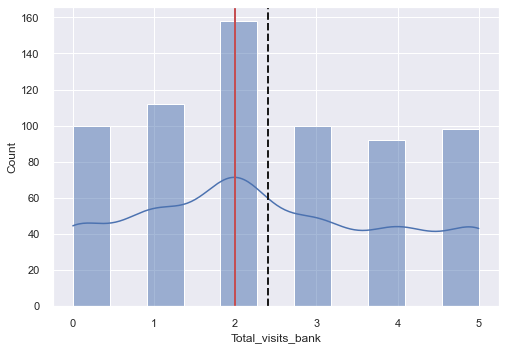

In [58]:
# Histplot for data['Total_visits_bank'] column


result = sns.histplot(data['Total_visits_bank'],kde=True)
plt.axvline(data['Total_visits_bank'].mean(), color='k', linestyle='dashed', linewidth=2) # display mean on graph
plt.axvline(data['Total_visits_bank'].median(), color='r', linestyle='-', linewidth=2) # display median on graph

**Insights**

- Maximum customers had 2 bank visits.
- There are approx equal number of customers for (0,1,3,4,5) bank visits.


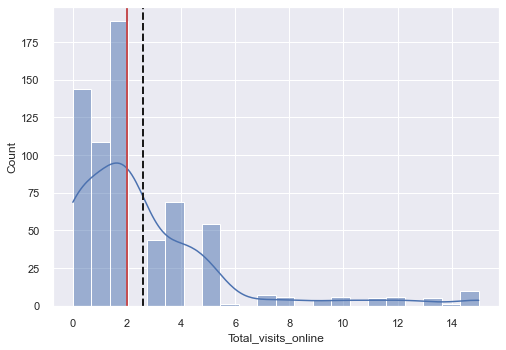

In [59]:
# Histplot for data['Total_visits_online'] column

result = sns.histplot(data['Total_visits_online'],kde=True)
plt.axvline(data['Total_visits_online'].mean(), color='k', linestyle='dashed', linewidth=2) # display mean on graph
plt.axvline(data['Total_visits_online'].median(), color='r', linestyle='-', linewidth=2) # display median on graph

**Insights**

- The distribution is left skewed.
- Majority of customers has less than or equal to 2 online visits.
- Very few customers have more than 8 online visits.


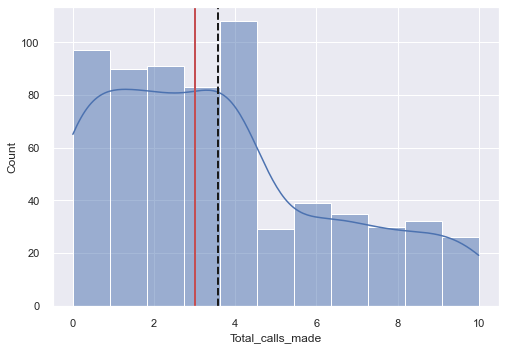

In [60]:
# Histplot for data['Total_calls_made'] column

result = sns.histplot(data['Total_calls_made'],kde=True)
plt.axvline(data['Total_calls_made'].mean(), color='k', linestyle='dashed', linewidth=2) # display mean on graph
plt.axvline(data['Total_calls_made'].median(), color='r', linestyle='-', linewidth=2) # display median on graph

**Insights**

- There is huge fall in number of customers who made more than 4 calls.
- Majority of customers made less than or equal to 4 calls.


**BoxPlot Graphs**

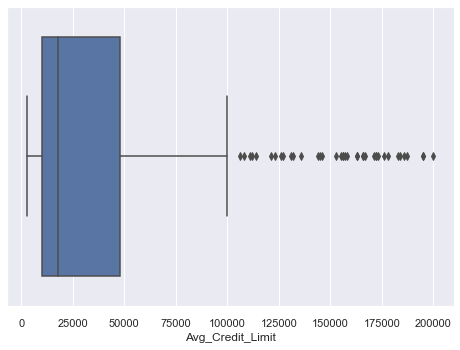

In [61]:
# Boxplot for data['Avg_Credit_Limit']

box_plot1 = sns.boxplot(x=data['Avg_Credit_Limit'])

**Insights**

- There are outliers towards right.
- 75 percent of customers have credit limit <50000
- The distribution is left skewed.


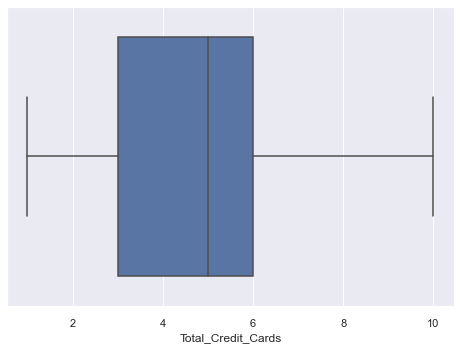

In [62]:
# Boxplot for data['Total_Credit_Cards']

box_plot2 = sns.boxplot(x=data['Total_Credit_Cards'])

**Insights**

- NO outliers
- More number of customers have 3-5 credit cards.

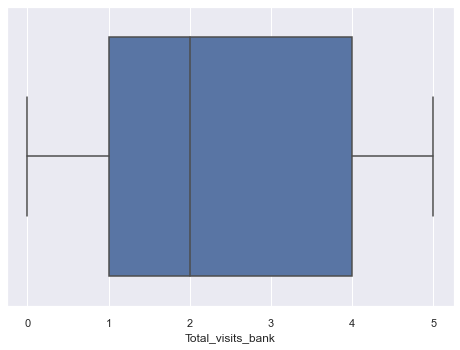

In [63]:
# Boxplot for data['Total_visits_bank']

box_plot3 = sns.boxplot(x=data['Total_visits_bank'])

**Insights**

- No outliers
- More customers had 2-4 bank visits.

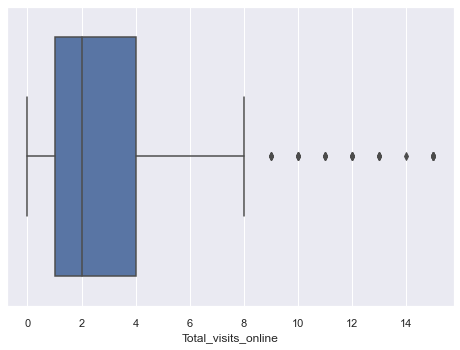

In [64]:
# Boxplot for data['Total_visits_online']

box_plot4 = sns.boxplot(x=data['Total_visits_online'])

**Insights**

- Outliers towards right. 

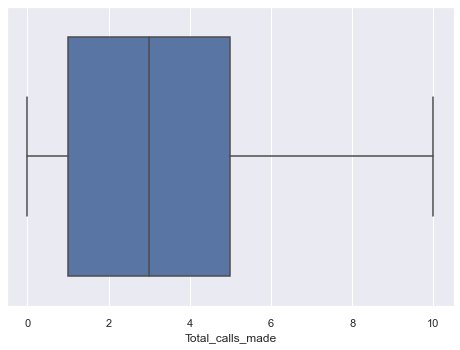

In [65]:
# Boxplot for data['Total_calls_made']

box_plot4 = sns.boxplot(x=data['Total_calls_made'])

**Insights**

- Boxplot shows No Outliers for Total_calls_made

**Ecdf plots**

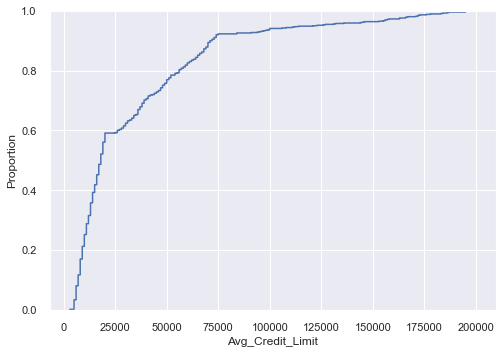

In [66]:
# Empirical cumulative distribution graph for data['Avg_Credit_Limit']

cdf1 = sns.ecdfplot(x=data['Avg_Credit_Limit'])

**Insights**

- approx 75-77% of customers have Avg_Credit_Limit< 50000
- approx 96% of customers have Avg_Credit_Limit< 75000

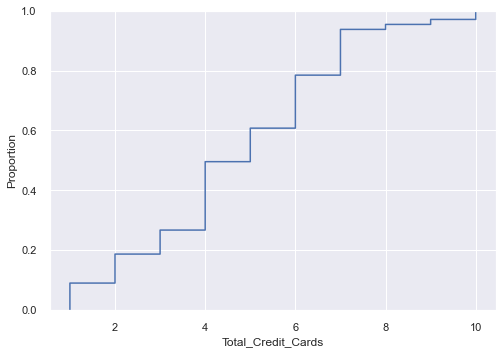

In [67]:
# Empirical cumulative distribution graph for data['Total_Credit_Cards']
cdf2 = sns.ecdfplot(x=data['Total_Credit_Cards'])

**Insights**

- 60% of customers have total_credit_cards<6

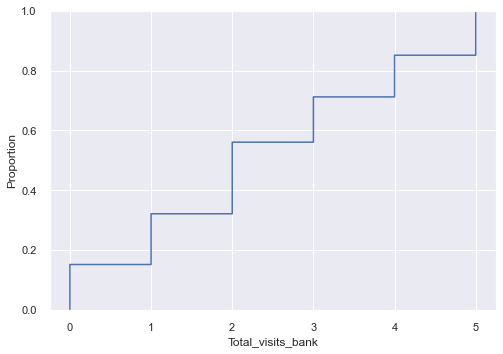

In [68]:
# Empirical cumulative distribution graph for data['Total_visits_bank']

cdf3 = sns.ecdfplot(x=data['Total_visits_bank'])

**Insights**

- 60% of customers have Total_visits_bank<=3

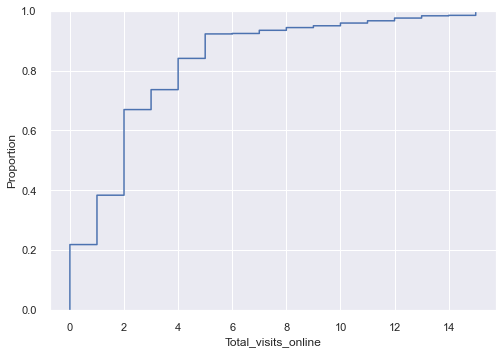

In [69]:
# Empirical cumulative distribution graph for data['Total_visits_online']

cdf4 = sns.ecdfplot(x=data['Total_visits_online'])

**Insights**

- approx 90% of customers have Total_visits_online<=6

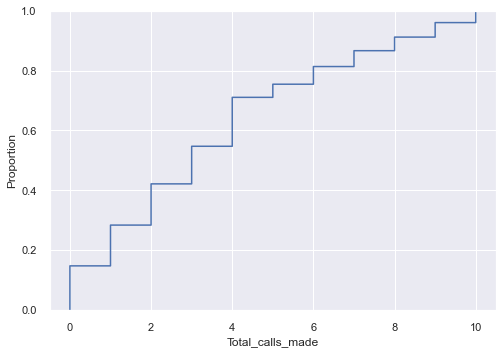

In [70]:
# Empirical cumulative distribution graph for data['Total_calls_made']

cdf5 = sns.ecdfplot(x=data['Total_calls_made'])

**Insights**

- 80% of customers have Total_calls_made<=6

### Bivariant Graphs 

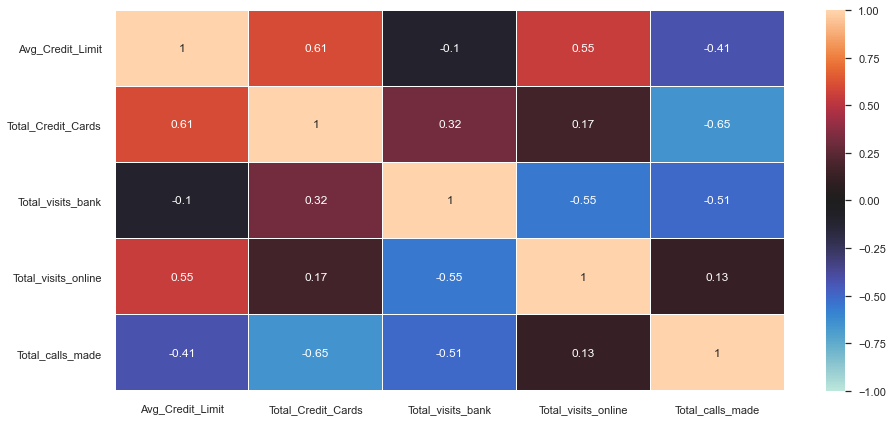

In [71]:
#Display HeatMap for selected columns in the given pandas dataframe

all_col = [ 'Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

**Insights**

- Total_Credit_Cards has decently high +ve correlation with Avg_Credit_Limit.
- Total_Credit_Cards has -ve correlation with Total_calls_made.

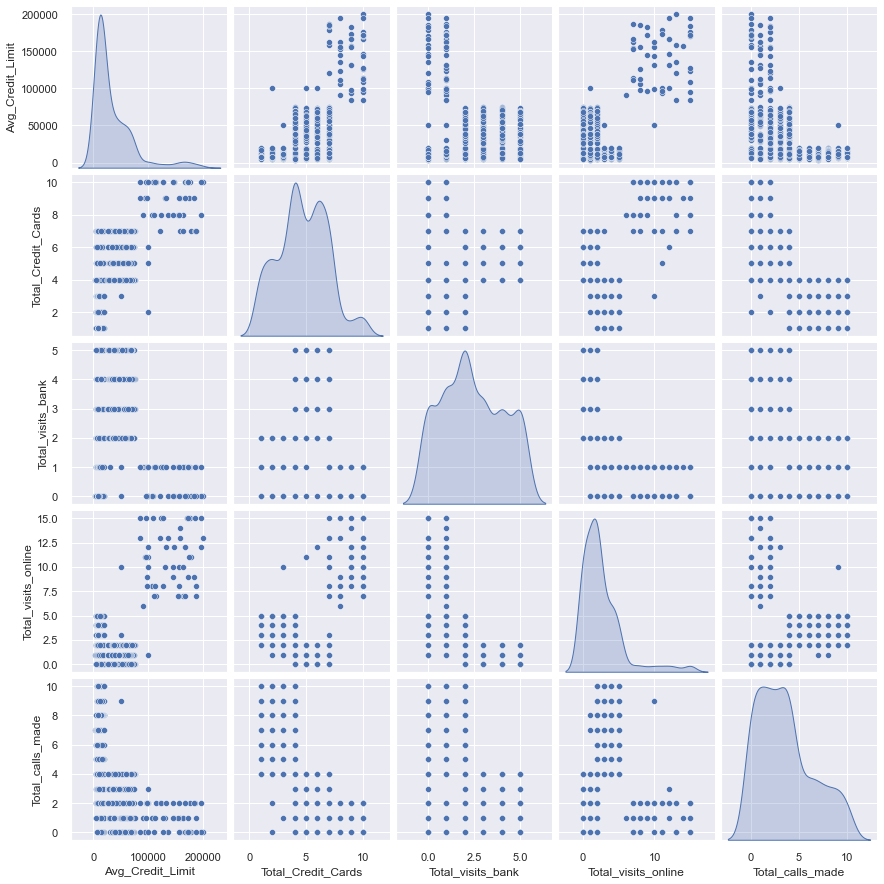

In [72]:
# Display pairplot for selected columns from Pandas df

sns.pairplot(df[all_col], diag_kind='kde')

**Insights**


- From Avg_Credit_limit kde graph : it appears data can have 3 basic clusters.
- Total_Credit_cards kde graph shows around 2 peaks with small projection on right. so we can consider 2-3 clusters.
- From Total_visits_online : it appears data can have 2 clusters where one group where total_visits_online is too high and other where total_visits_online is too low.
- Total_calls_made kde graph also shows two distinct partitions in the data so we may consider minimum of 2 clusters.


**Scatter plots**

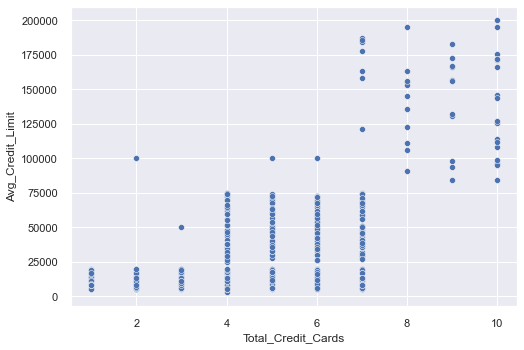

In [73]:
# Display scatter plot for data['Total_Credit_Cards'] and data['Avg_Credit_Limit']

sns.scatterplot(x=data['Total_Credit_Cards'],y=data['Avg_Credit_Limit'])

**Insights**

- Customers with Total_Credit_Cards>7 have Avg_Credit_limit >75000.
- Customers with Total_Credit_Cards<7 have Avg_Credit_Limit in the range ( 0 to 75000) and few have 100000.


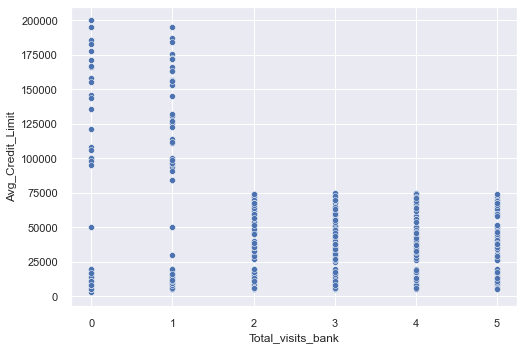

In [74]:
# Display scatter plot for data['Total_visits_bank'] and data['Avg_Credit_Limit']

sns.scatterplot(x=data['Total_visits_bank'],y=data['Avg_Credit_Limit'])

**Insights**

- Customers who made Total_visits_bank >1 have Avg_Credit_Limit<=75000
- Customers with more Avg_Credit_limit had either zero visits or one visit to bank.


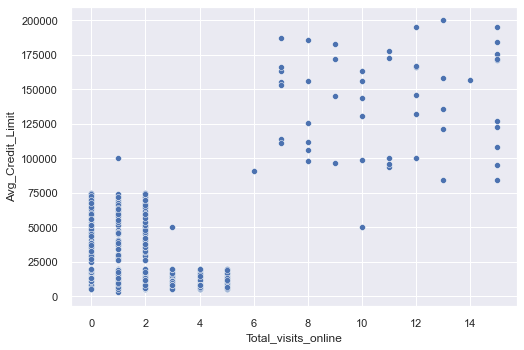

In [75]:
# Display scatter plot for data['Total_visits_online'] and data['Avg_Credit_Limit']

sns.scatterplot(x=data['Total_visits_online'],y=data['Avg_Credit_Limit'])

**Insights**

- Graph clearly shows customers with Avg_Credit_Limit <75000 did less online visits. but in previous graph, it shows this category made more bank visits.
- Customers with Avg_Credit_Limit > 75000 did more online visits and less bank visits.

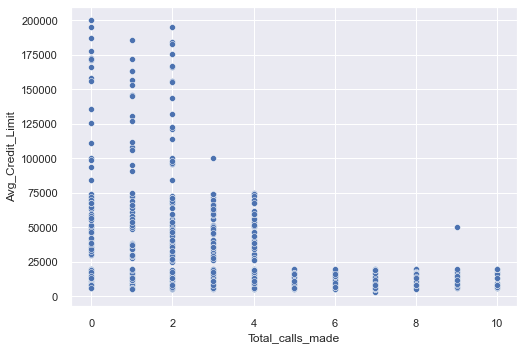

In [76]:
# Display scatter plot for data['Total_calls_made'] and data['Avg_Credit_Limit']

sns.scatterplot(x=data['Total_calls_made'],y=data['Avg_Credit_Limit'])

**Insights**


- Customers with Avg_Credit_Limit >75000 had made only 0-2 calls.
- Many Customers with Avg_Credit_Limit <75000 had made more number of calls.

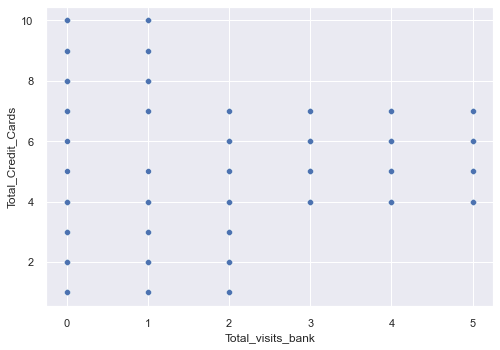

In [77]:
# Display scatter plot for data['Total_visits_bank'] and data['Total_Credit_Cards']

sns.scatterplot(x=data['Total_visits_bank'],y=data['Total_Credit_Cards'])

In [78]:
# Crosstab disply for data['Total_visits_bank'] and data['Total_Credit_Cards']

ct_df1 = pd.crosstab(data['Total_visits_bank'],data['Total_Credit_Cards'])
ct_df1

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
Total_visits_bank,,,,,,,,,,
0,21,25,21,13,1,1,4,4,3,7
1,21,19,18,22,1,0,4,7,8,12
2,17,20,14,35,24,24,24,0,0,0
3,0,0,0,26,15,34,25,0,0,0
4,0,0,0,27,18,24,23,0,0,0
5,0,0,0,28,15,34,21,0,0,0


**Insights from crosstab and scatterplot**


- Customers with less(1-3) total credit cards have made less number of bank visits.
- Majority of Customers with more number of Credit cards have made more number of bank visits.

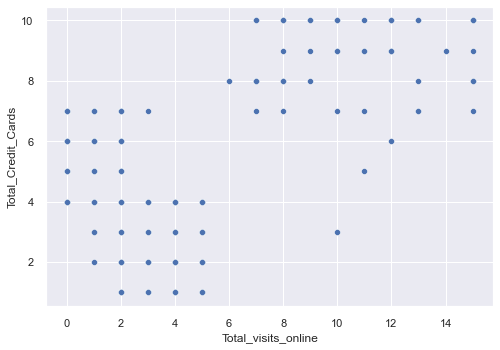

In [79]:
# Display scatter plot for data['Total_visits_online'] and data['Total_Credit_Cards']

sns.scatterplot(x=data['Total_visits_online'],y=data['Total_Credit_Cards'])

In [80]:
# Crosstab disply for data['Total_visits_online'] and data['Total_Credit_Cards']

ct_df2 = pd.crosstab(data['Total_visits_online'],data['Total_Credit_Cards'])
ct_df2

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
Total_visits_online,,,,,,,,,,
0,0,0,0,44,22,35,43,0,0,0
1,0,1,2,25,23,38,20,0,0,0
2,18,14,12,44,28,43,30,0,0,0
3,9,15,8,11,0,0,1,0,0,0
4,17,18,14,20,0,0,0,0,0,0
5,15,16,16,7,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,4,0,2
8,0,0,0,0,0,0,1,2,1,2


**Insights from crosstab and scatterplot**

- Customers with less(2-4) total credit cards have made less number(2-5) of online visits.
- Majority of Customers with more number of Credit cards have also done less number of online visits.

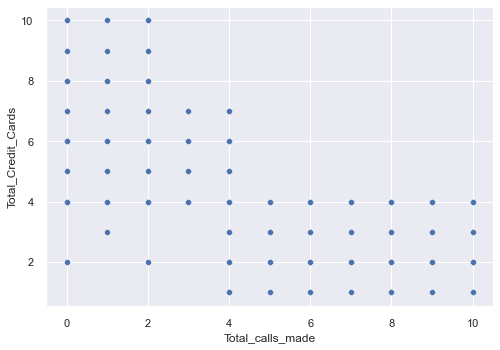

In [81]:
# Display scatter plot for data['Total_calls_made'] and data['Total_Credit_Cards']

sns.scatterplot(x=data['Total_calls_made'],y=data['Total_Credit_Cards'])

In [82]:
# Crosstab for data['Total_calls_made'] and data['Total_Credit_Cards']

ct_df3 = pd.crosstab(data['Total_calls_made'],data['Total_Credit_Cards'])
ct_df3

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
Total_calls_made,,,,,,,,,,
0,0,1,0,23,13,27,20,4,3,6
1,0,0,1,22,14,22,18,5,2,6
2,0,1,0,21,15,20,19,2,6,7
3,0,0,0,19,14,30,20,0,0,0
4,6,12,7,23,18,18,24,0,0,0
5,8,7,8,6,0,0,0,0,0,0
6,7,11,13,8,0,0,0,0,0,0
7,12,8,6,9,0,0,0,0,0,0
8,7,12,4,7,0,0,0,0,0,0


**Insights from crosstab and scatterplot**

- Customers with more number(4-7) of credit cards made less(0-3) calls
- Customers with less number(1-3) of credit cards made more(4-10) calls.

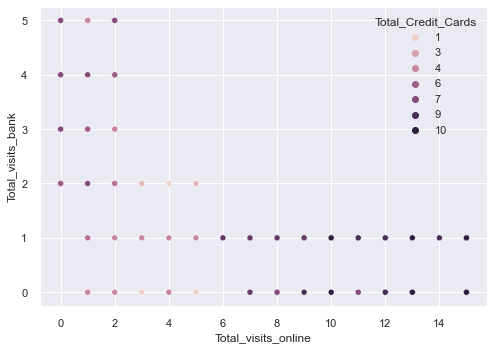

In [83]:
# Display scatter plot for data['Total_visits_online'] and data['Total_visits_bank']

sns.scatterplot(x=data['Total_visits_online'],y=data['Total_visits_bank'],hue= data['Total_Credit_Cards'])

In [84]:
# Crosstab for data['Total_visits_online'] and data['Total_visits_bank']

ct_df4 = pd.crosstab(data['Total_visits_bank'],data['Total_visits_online'])
ct_df4

Total_visits_online,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Total_visits_bank,,,,,,,,,,,,,,,,
0,0,3,20,17,23,16,0,2,3,1,2,2,3,4,0,4
1,0,2,15,11,30,24,1,5,3,3,4,3,3,1,1,6
2,40,27,45,16,16,14,0,0,0,0,0,0,0,0,0,0
3,32,33,35,0,0,0,0,0,0,0,0,0,0,0,0,0
4,31,23,38,0,0,0,0,0,0,0,0,0,0,0,0,0
5,41,21,36,0,0,0,0,0,0,0,0,0,0,0,0,0


**Insights from crosstab and scatterplot**

- Customers who made more online vists made less bank visits and vise versa.
   - meaning Total_visits_bank and Total_visits_online are inversely related.
   

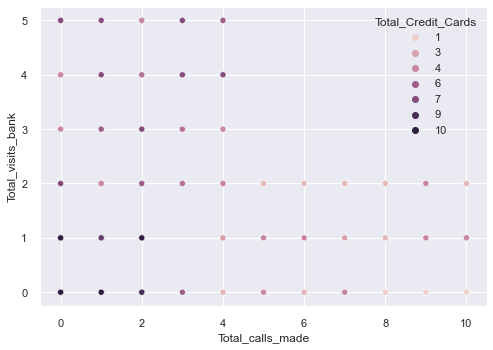

In [85]:
# Display scatter plot for data['Total_calls_made'] and data['Total_Credit_Cards']

sns.scatterplot(x=data['Total_calls_made'],y=data['Total_visits_bank'],hue= data['Total_Credit_Cards'])

In [86]:
# Crosstab for data['Total_calls_made'] and data['Total_Credit_Cards']

ct_df5 = pd.crosstab(data['Total_visits_bank'],data['Total_calls_made'])
ct_df5

Total_calls_made,0,1,2,3,4,5,6,7,8,9,10
Total_visits_bank,,,,,,,,,,,
0,7,6,8,1,10,10,10,13,11,12,12
1,10,10,11,0,15,10,14,12,9,12,9
2,19,14,21,18,29,9,15,10,10,8,5
3,21,19,18,21,21,0,0,0,0,0,0
4,21,19,18,23,11,0,0,0,0,0,0
5,19,22,15,20,22,0,0,0,0,0,0


**Insights from crosstab and scatterplot**

- Customers who made more number of calls(6-10) had less bank visits.
- Majority of Customers who made less number of calls(0-5) had made more bank visits.
- Customers with less credit cards made more number of calls and made less bank visits.


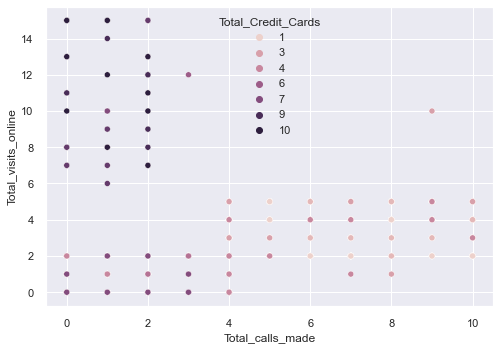

In [87]:
# Display scatter plot for data['Total_calls_made'] and data['Total_visits_online']

sns.scatterplot(x=data['Total_calls_made'],y=data['Total_visits_online'],hue= data['Total_Credit_Cards'])

In [88]:
# Cross tab for data['Total_calls_made'] and data['Total_visits_online']

ct_df6 = pd.crosstab(data['Total_visits_online'],data['Total_calls_made'])
ct_df6

Total_calls_made,0,1,2,3,4,5,6,7,8,9,10
Total_visits_online,,,,,,,,,,,
0,30,26,27,26,35,0,0,0,0,0,0
1,30,16,19,18,24,0,0,1,1,0,0
2,21,33,27,38,26,9,9,9,5,4,8
3,0,0,0,0,7,5,7,9,5,3,8
4,0,0,0,0,10,6,15,10,10,13,5
5,0,0,0,0,6,9,8,6,9,11,5
6,0,1,0,0,0,0,0,0,0,0,0
7,3,2,2,0,0,0,0,0,0,0,0
8,2,3,1,0,0,0,0,0,0,0,0


**Insights from crosstab and scatterplot**

- Majority of customers made (0-5) calls and (0-4) online visits.

In [ ]:
### Estimation on Number of clusters from EDA

In [ ]:
- From Avg_Credit_limit, we can see minimum of 3 groups from histogram kde where there are one huge peaks, a slight projection as two groups 
    and outliers as another group.
      - Even the data where Avg_Credit_limit<50000,50000>Avg_Credit_limit<75000,Avg_Credit_limit>75000 show different 
        behaviours with respect to Total_visits_online,Total_calls_made etc
        
- Total_Credit_Cards kde shows 2 peaks so minimun of 2 clusters with respect to Total_Credit_Cards.

### Overall Observations from EDA

**Insights from Histplots**

- Avg_Credit_Limit distribution is left skewed.
- Majority of customers - the Avg credit limit is <25000
- Maximum customers had 2 bank visits.
- There are approx equal number of customers for (0,1,3,4,5) bank visits.
- Majority of customers has less than or equal to 2 online visits.
- Very few customers have more than 8 online visits.
- There is huge fall in number of customers who made more than 4 calls.
- Majority of customers made less than or equal to 4 calls.

  **Conclusions from Histplots**
    - Looks like many of the customers have Avg_credit_limit<25000
    - As there are more number of customers with 2 bank visits, it looks like it requires minimum of 2 bank visits to get most of the services from bank
    - As there are more number of customers have done only 0-2 online vists,it looks like major customer base is not confortable with online visits.
    - As There is huge fall in number of customers who made more than 4 calls, we can derive that most of complaints are getting solved within 4 calls.


**Insights from Boxplots**

- There are outliers towards right in Avg_Credit_limit boxplot.
- 75 percent of customers have credit limit <50000
- No outliers for Total_Credit_Cards,Total_visits_bank,Total_calls_made,Total_visits_online.

  **Conclusions from Boxplots**
  - There are very few people with more Avg_Credit_Limit. 
  - No extreame values with respect to Total_Credit_Cards,Total_visits_bank,Total_calls_made,Total_visits_online. so meaning there are no serious service provision issues or escalation scenarios in this respect.
  
  
**Insights from ecdfplots**

- approx 75-77% of customers have Avg_Credit_Limit< 50000
- approx 96% of customers have Avg_Credit_Limit< 75000
- 60% of customers have total_credit_cards<6
- 60% of customers have Total_visits_bank<=3
- approx 90% of customers have Total_visits_online<=6
- 80% of customers have Total_calls_made<=6

  **Conclusions from ecdfplots**
  - Majority of customers have Avg_Credit_Limit<50000
  - Around 60% of customers make 0-3 bank visits meaning 0-3 banks visits are required to get most of the  services.
  - Maximum of 6 online visits are done by most of Customers.
  - 80% of customers complaints are resolved by <=6 calls.
  
  
**Insights from Bivaraint plots**

- Total_Credit_Cards has decently high +ve correlation with Avg_Credit_Limit.
- Total_Credit_Cards has -ve correlation with Total_calls_made.
- Customers who made Total_visits_bank >1 have Avg_Credit_Limit<=75000
- Customers with more Avg_Credit_limit had either zero visits or one visit to bank.
- Customers with Avg_Credit_Limit > 75000 did more online visits and less bank visits.

- Customers with less(2-4) total credit cards have made less number(2-5) of online visits.
- Majority of Customers with more number of Credit cards have also done less number of online visits.


- Customers with more number(4-7) of credit cards made less(0-3) calls
- Customers with less number(1-3) of credit cards made more(4-10) calls.


- Customers who made more online vists made less bank visits and vise versa.
   meaning Total_visists_bank and Total_visits_online are inversely related.
   
- Customers with less number of Credit Cards have made less online and bank visits.

- Majority of customers made (0-5) calls and (0-4) online visits.

  **Conclusions from Bivaraint plots**
  
  - Customers with more CreditLimits(approx >75000) have:
      - preferred online visits 
      - less bank visits
      - more number of credit cards
      - less number of calls
      - this concludes that the customers with more CreditLimit are more satisfied with services, no bank visits required.   
      
  - Customers with more CreditLimits(approx <25000) made:
      - less online visits 
      - more bank visits
      - less number of credit cards
      - more number of calls
      - this concludes that the customers with less CreditLimit are have more queries, assitance required. not confortable with online services. need more bank inperson visits.
      
  - Customers with more CreditLimits(approx >75000) made:
      - more online visits 
      - less bank visits
      - more number of credit cards
      - less number of calls
      - this concludes that the customers with more CreditLimit are more satisfied with services, no bank visits required.
      
  - Customers with less Number of CreditCards made:
      - less online visits 
      - more bank visits
      - more number of calls
      - this concludes that the customers with less Number of CreditCards are have more queries, assitance required. not confortable with online services. need more bank inperson visits.
      
  - Suprisingly even Customers with (4-7) number of credit cards had only 1-2 online visits.meaning looks like customers are not confortable with online services.
  
     
      
  

  
  









### KMeans

In [91]:
print(data.columns)
# get the required columns for scaling and clustering algorithms.
# removing 'Sl_No', 'Customer Key' from the column list which are not required for clustering
req_cols= ['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [92]:
# Scale the data using Standard Scaler
scaler=StandardScaler()
subset=data[req_cols].copy()
subset_scaled=scaler.fit_transform(subset)  

In [94]:
# Creating a dataframe of the above results with the required columns
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

In [99]:
clusters=range(2,10)  # setting a range of clusters to implement KMeans algorithm and analyze clustering for each vlaue of k

meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)  # define KMeans function for each k vlaues
    model.fit(subset_scaled_df) # fit the function for each k value
    prediction=model.predict(subset_scaled_df) # predict the cluster index for each sample
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0] # Calculate the distorsions for each k 
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)



Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9431029376988642
Number of Clusters: 7 	Average Distortion: 0.9094880438451726
Number of Clusters: 8 	Average Distortion: 0.8905140543806928
Number of Clusters: 9 	Average Distortion: 0.8658522827602021


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

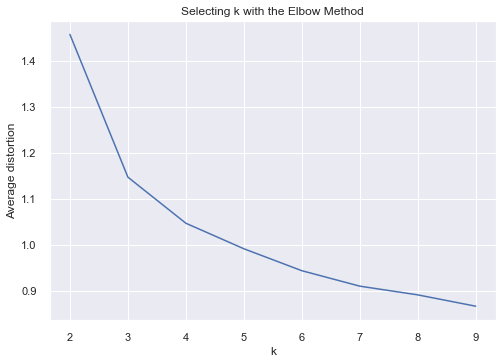

In [100]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [108]:
# k= 3,4,5  appear to be ideal values for k

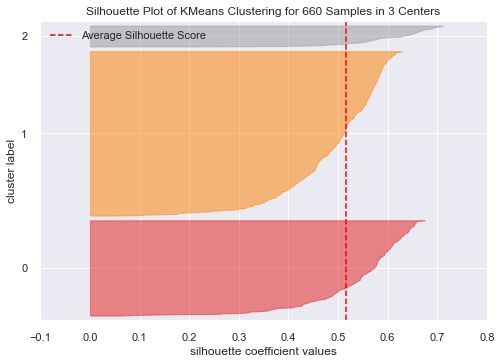

In [109]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

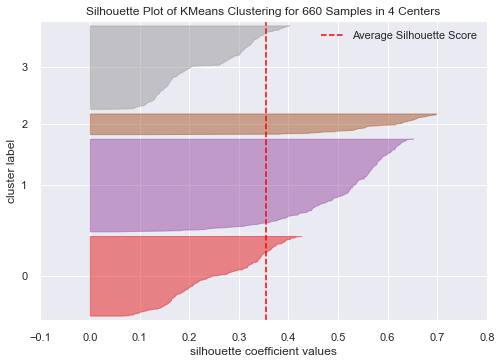

In [110]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

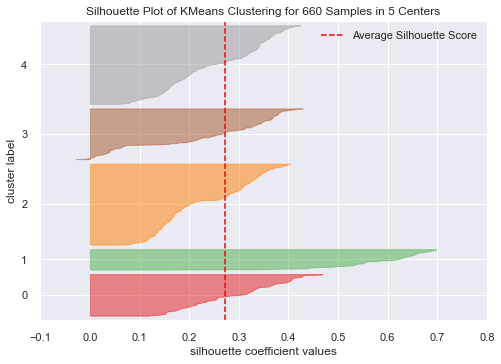

In [106]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

**Conclusion on number of clusters**

- k=3 appears to be more compressed. looks like less clustered with more data points in each cluster.
- k=4 seems to be more segregated also with less average silhoutte coefficient. 
   - From the analysis of elbow method and silhoutte visualizer , i am deciding to go with 4 clusters.


### Final KMeans algorithm implementation with selected k=4 value

In [112]:
# Run KMeans wiht K=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [294]:
data['K_means_segments'] = kmeans.labels_  # get cluster labels for each data point for original data frame
subset_scaled_df['K_means_segments'] = kmeans.labels_  # get cluster labels for each data point for scaled data frame

In [295]:
kMeans_cluster_profile = data.iloc[:,2:].groupby('K_means_segments').mean()  # get means values for all clumns in each cluster
# Add number of data points in each cluster as a column to kMeans_cluster_profile dataframe
kMeans_cluster_profile['cluster_wise_total_counts']= data.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [131]:
# display cluster profile with highlighting high values
kMeans_cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_wise_total_counts
K_means_segments,,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377,199
1,12167.420814,2.393665,0.927602,3.574661,6.923077,221
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,31226.315789,5.478947,4.515789,1.010526,1.936842,190


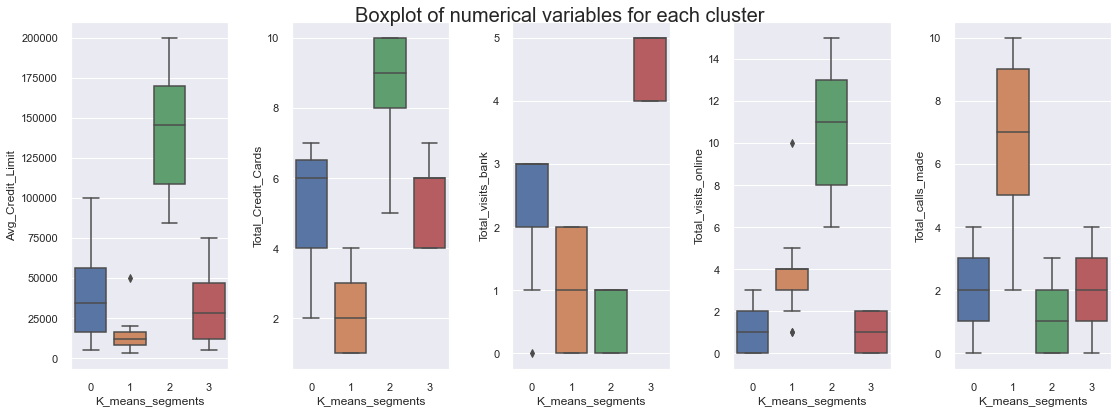

In [136]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))  # set axis for 5 subplots
fig.suptitle('K Means:Boxplot of numerical variables for each cluster', fontsize=20) # set title for subplots
counter = 0
for ii in range(5): # to iterate for 5 columns
    sns.boxplot(ax=axes[ii],y=data[req_cols[counter]],x=data['K_means_segments']) # plot 4 boxplots for each segment for given column 
    counter = counter+1 # increment the counter

fig.tight_layout(pad=2.0) # set the layout for subplots

### Analyse the KMeans clusters from boxplots

- **Cluster 0:**
    - with Avg_Credit_Limit,Total_credit_cards - values spread over wide range from low to decently high.
      which means that there are customers with very less credit limit, less number of cards, and few customers with high credit limit, more credit cards.suggesting wide range expenditure classes in this segments.
    - Looks like this segment tried to communicate with bank either through bank visits or calls.
    - Online visits number is low which may show that they are not comfortable with online or bank websites.

- **Cluster 1:**
    - This customer segment show very low Avg_Credit_Limit, Total_Credit_Cards suggesting that they might be from low income group.
    - They mode minimum bank visits and considerably more online visits .so it implies if possible they want to get work done online rather than bank visit.
    - This group has made high number of Total_call_made. which implies that they have more complaints with the services.
    
    
- **Cluster 2:**
    - This segment of customers appear to belong to high income group as they have upper ranges for Avg_Credit_Limit, Total_Credit_Cards.
    - They made very less bank visits and many online visits which implies that they prefer online visits over bank visits.
    - They did not make more calls meaning they might not have more complaints on services.


- **Cluster 3:**
   - This customers segment looks like middle class income group as majority of customers Avg_Credit_Limit is just greater  than low end.
   - This group has made extremely high bank visits. indicating that they are more mobile.may be their occupation is has more travel which facilitates them for bank visits.
   - These customers have taken decently more number of credit cards which also indicates their mobility requirement and unexpected expenses.
   - This group also made average of 2 calls indicating they have some complaints with the services.
   
   
    


### Hierarchial Clustering

#### Chophenet Correlation Coefficient

**Calculate cophenet index for different cluster derived using differnt linkage methods and distances.**
- cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
- closer it is to 1, the better is the clustering

In [248]:
# calculate cophenet index for specified distance metrics and linkage methods.


dist_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock'] # create distance metrics  list
link_methods = ['single', 'complete', 'average', 'weighted']  # create link methods list
hc_coph_list1 = []  # create empty list to capture list of tuples as ( distance, linkage, c )
high_coph_corr1 = 0 # variable to capture the highest c value. initialzed the variable with 0.
high_dm_lm1 = ['','']  # list to capture distance metric and linkage method that gives highest c value

for dm in dist_metrics:  #iterate on list dist_metrics
    for lm in link_methods: #iterate on list link_methods
        Z = linkage(subset_scaled_df, metric=dm, method=lm)  # call linkage method to generate linkage matrix
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df)) # calculate cophenet coefficient
        hc_coph_list1.append((dm,lm,c))  # append the tuple of dm,lm,c to list
        if high_coph_corr1 < c: # get the highest c value in the entire iteration cycle
            high_coph_corr1 = c
            high_dm_lm1[0] = dm
            high_dm_lm1[1] = lm

#create a pandas dataframe with all Cophenet_corr_coeff and corresponding distance-linkage pair
df = pd.DataFrame({'temp':hc_coph_list1})  
hc_coph_pdf1 = pd.DataFrame(df['temp'].tolist(),index=df.index,columns=['distance','linkage','Cophenet_corr'])
hc_coph_pdf1.head(30)  # display the calculated Cophenet_corr as dataframe

,distance,linkage,Cophenet_corr
0,euclidean,single,0.828852
1,euclidean,complete,0.887647
2,euclidean,average,0.920659
3,euclidean,weighted,0.894095
4,chebyshev,single,0.807330
5,chebyshev,complete,0.892638
6,chebyshev,average,0.917353
7,chebyshev,weighted,0.862798
8,mahalanobis,single,0.872368
9,mahalanobis,complete,0.549457


In [241]:
print('Highest cophenet correlation is {}, which is obtained with {} distance metric and {} linkage method'.format(high_coph_corr1 ,high_dm_lm1[0],high_dm_lm1[1]))

Highest cophenet correlation is 0.9206593641927059, which is obtained with euclidean distance metric and average linkage method


**Calculate cophenet correlation for 'centroid', 'median','ward' linkage method**
**which requires only Euclidean distance metrics**

In [254]:
link_methods = ['centroid','median','ward']  # list of linkage methods which require only Euclidean distance 
high_coph_corr2 = 0  # initialize the high_coph_corr2 to 0
high_dm_lm2 = ['',''] # list to capture distance metric and linkage method that gives highest c value
hc_coph_list2 = []  # create empty list to capture list of tuples as ( distance, linkage, c )

for lm in link_methods: #iterate on list link_methods
    Z = linkage(subset_scaled_df, metric='euclidean', method=lm) # call linkage method to generate linkage matrix
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df)) # calculate cophenet coefficient
    hc_coph_list2.append(('euclidean',lm,c)) # append the tuple of dm,lm,c to list
    if high_coph_corr2 < c: # get the highest c value in the entire iteration cycle
        high_coph_corr2 = c
        high_dm_lm2[0] = 'euclidean'
        high_dm_lm2[1] = lm

#create a pandas dataframe with all Cophenet_corr_coeff and corresponding distance-linkage pair
df = pd.DataFrame({'temp':hc_coph_list2})  
hc_coph_pdf2 = pd.DataFrame(df['temp'].tolist(),index=df.index,columns=['distance','linkage','Cophenet_corr'])
hc_coph_pdf2.head(20)  # display the calculated Cophenet_corr as dataframe

,distance,linkage,Cophenet_corr
0,euclidean,centroid,0.918176
1,euclidean,median,0.881071
2,euclidean,ward,0.815008


In [255]:
print('Highest cophenet correlation is {}, which is obtained with {} distance metric and {} linkage method'.format(high_coph_corr2 ,high_dm_lm2[0],high_dm_lm2[1]))

Highest cophenet correlation is 0.9181756812534806, which is obtained with euclidean distance metric and centroid linkage method


In [269]:
# Combine all chophenet coefficients for different diatance , linkage pairs into one pandas dataframe for easy compare

hc_coph_pdf = pd.concat([hc_coph_pdf1,hc_coph_pdf2],ignore_index=True)
hc_coph_pdf = hc_coph_pdf.sort_values('Cophenet_corr',ascending = False)  # sort values in descending order of Cophenet_corr
hc_coph_pdf.head(50)

,distance,linkage,Cophenet_corr
2,euclidean,average,0.920659
16,euclidean,centroid,0.918176
6,chebyshev,average,0.917353
14,cityblock,average,0.896123
3,euclidean,weighted,0.894095
5,chebyshev,complete,0.892638
1,euclidean,complete,0.887647
17,euclidean,median,0.881071
8,mahalanobis,single,0.872368
13,cityblock,complete,0.870578


#### Dendrogram Graphs

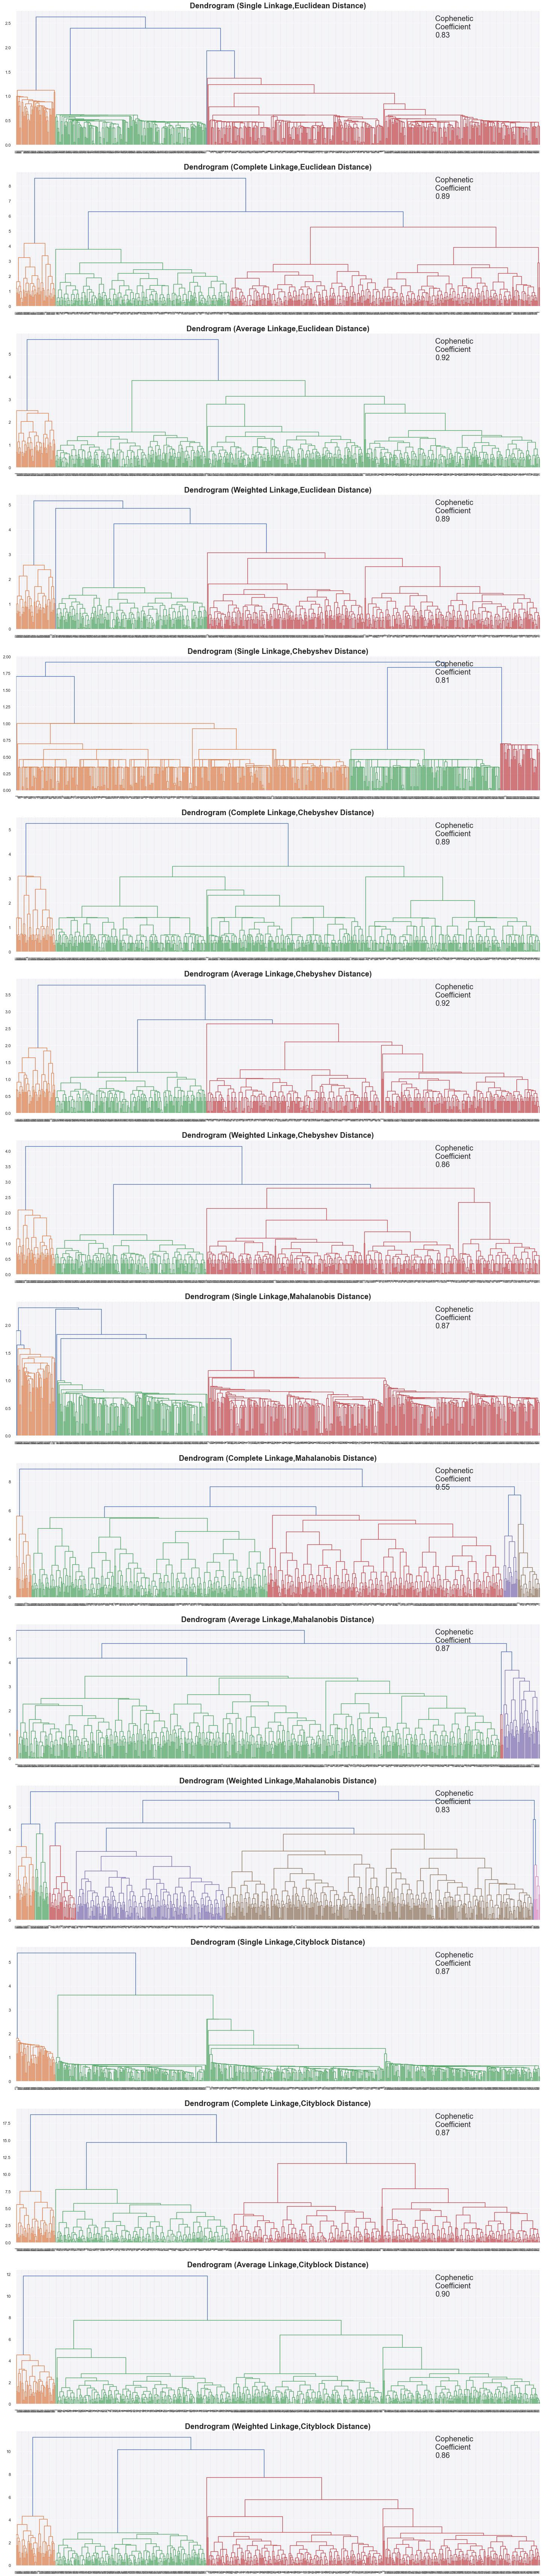

In [274]:
# List of all linkage methods and distance types to check

dist_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
link_methods = ['single', 'complete', 'average', 'weighted']

# Create a subplot image
graphs =  len(link_methods)*len(dist_metrics)
fig, axs = plt.subplots(graphs, 1, figsize=(25, 125))

i=0
# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for dm in range(len(dist_metrics)):
    for lm in range(len(link_methods)):
        Z = linkage(subset_scaled_df, metric=dist_metrics[dm], method=link_methods[lm]) # call linkage method to generate linkage matrix
        dendrogram(Z, ax=axs[i]);  # draw dendrogram
        # set title
        axs[i].set_title(f'Dendrogram ({link_methods[lm].capitalize()} Linkage,{dist_metrics[dm].capitalize()} Distance)',fontweight="bold", size=20)
        # calculate coph_corr
        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction', size=20)
        compare.append([link_methods[lm],dist_metrics[dm], coph_corr])
        i=i+1


**Draw Dendrograms for 'centroid', 'median','ward' linkage method**
**which requires only Euclidean distance metrics**

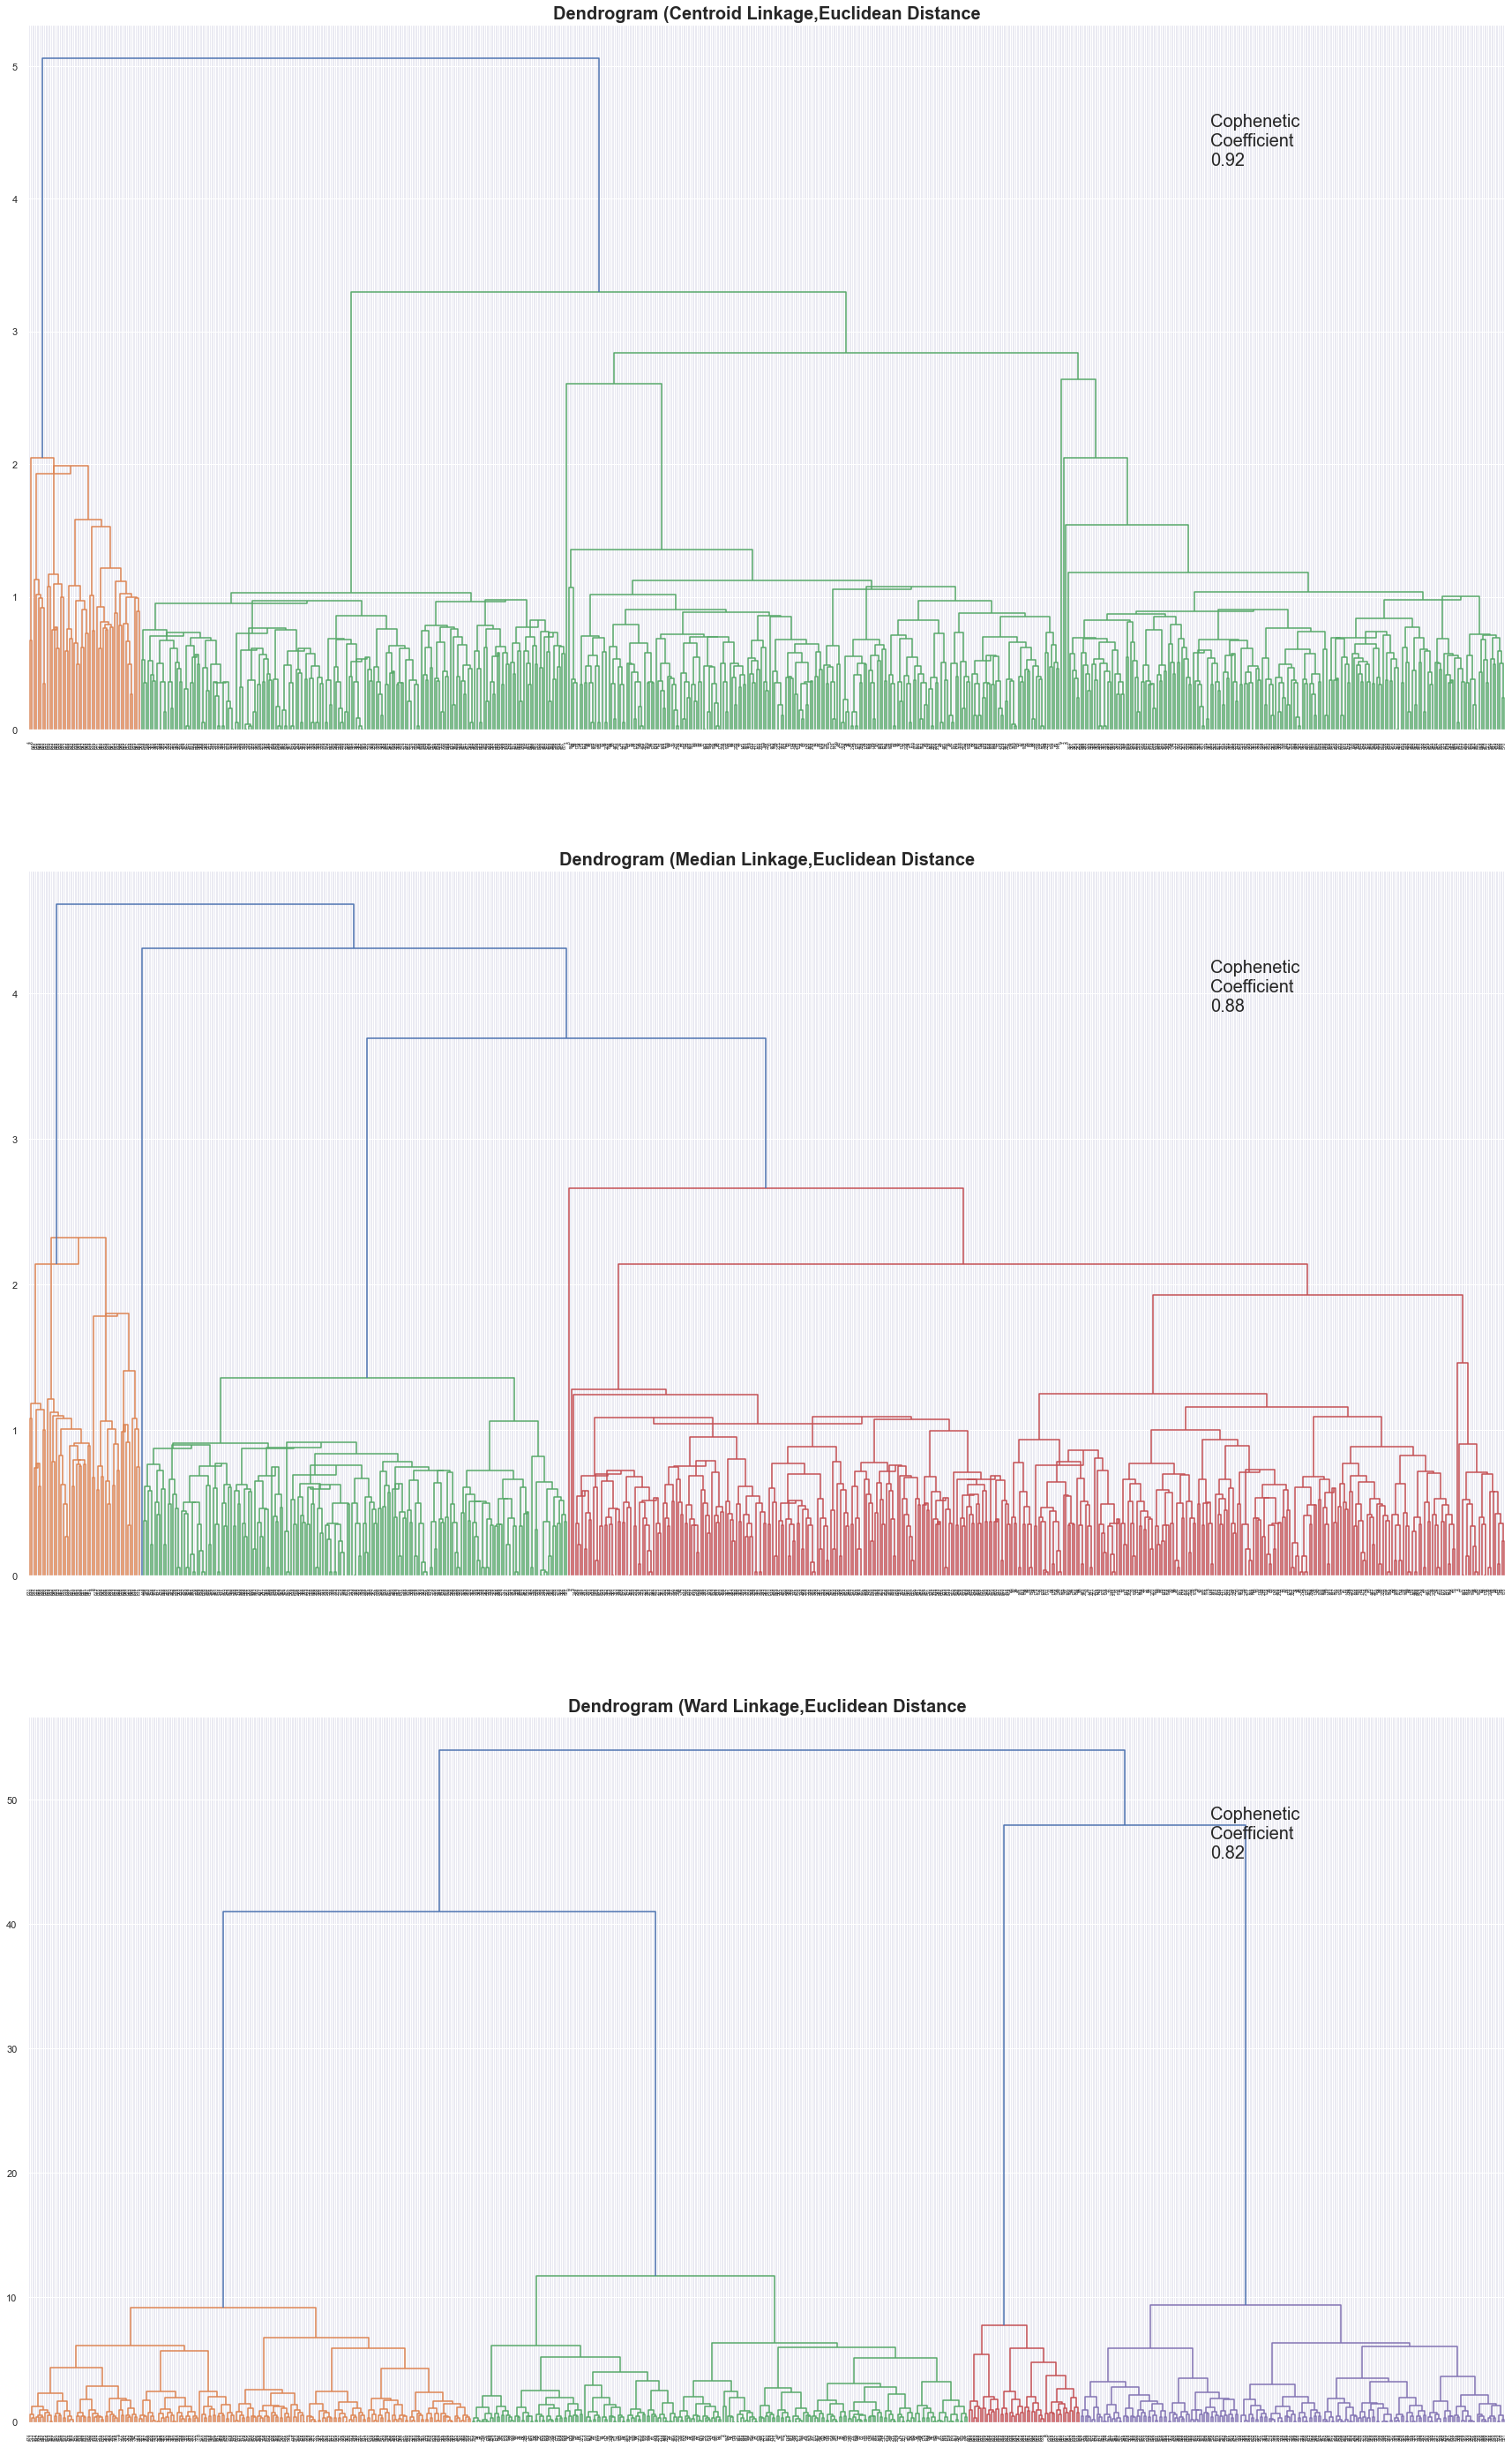

In [290]:
# List of all linkage methods and distance types to check


link_methods = ['centroid', 'median','ward']

# Create a subplot image
fig, axs = plt.subplots(3, 1, figsize=(30, 50))

i=0
# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient

for lm in range(len(link_methods)):
    Z = linkage(subset_scaled_df, metric='euclidean', method=link_methods[lm]) # call linkage method to generate linkage matrix
    dendrogram(Z, ax=axs[i]);  # draw dendrogram
    # set title
    axs[i].set_title(f'Dendrogram ({link_methods[lm].capitalize()} Linkage,'+'Euclidean Distance)',fontweight="bold", size=20)
    # calculate coph_corr
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    # add annotation to the graph
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                (0.80, 0.80),
                xycoords='axes fraction', size=20)
    i=i+1

**Conclustions from Dendrograms**
Ward Linkage and Euclidean distance dendrogram shows clear separate and distinct clusters
4 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

**Conclustions from Dendrograms and chophenet coefficient**
- As per chophenet coefficient, (euclidean	average	0.920659) this pair gives highest chophenet value but (euclidean,average) dendrogram is not clear, lot of overlaps and only two cluster distinctions.

- As per Dendrograms,Ward Linkage and Euclidean distance dendrogram  shows clear separate and distinct clusters.
its chophenet coefficient score(0.82) is also decently high not very less.
also it shows number of clusters as 4 which coincides with KMeans selected algorithm from elbow method.

    <B>so I select the pair (Ward Linkage and Euclidean distance and n_clusters=4) for Hierarchial clustering as final algorithm to do clustering on data.<B>

### Hirarchial CLustering Implementation with selected distance, linkage(Euclidean, Ward) pair

In [296]:
hc_selected_model = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward') # Hierarchial Clustering Implementation
hc_selected_model.fit(subset_scaled_df)
data['HC_segments'] = hc_selected_model.labels_  # get cluster labels for each data point for original data frame
subset_scaled_df['HC_segments'] = hc_selected_model.labels_  # get cluster labels for each data point for scaled data frame

In [300]:
HC_cluster_profile = data.iloc[:,2:].groupby('HC_segments').mean()  # get means values for all columns in each cluster
# Add number of data points in each cluster as a column to kMeans_cluster_profile dataframe
HC_cluster_profile['cluster_wise_total_counts']= data.groupby('HC_segments')['Total_Credit_Cards'].count().values

In [301]:
# display cluster profile with highlighting high values
HC_cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,cluster_wise_total_counts
HC_segments,,,,,,,
0,12180.180180,2.396396,0.923423,3.563063,6.896396,0.995495,222
1,31226.315789,5.478947,4.515789,1.010526,1.936842,3.000000,190
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,36010.101010,5.535354,2.489899,0.969697,2.080808,0.000000,198


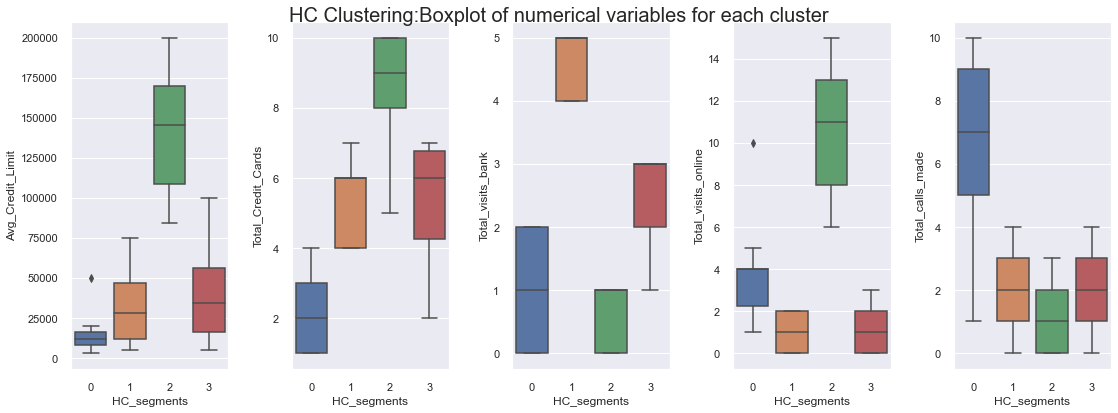

In [304]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))  # set axis for 5 subplots
fig.suptitle('HC Clustering:Boxplot of numerical variables for each cluster', fontsize=20) # set title for subplots
counter = 0
for ii in range(5): # to iterate for 5 columns
    sns.boxplot(ax=axes[ii],y=data[req_cols[counter]],x=data['HC_segments']) # plot 4 boxplots for each segment for given column 
    counter = counter+1 # increment the counter

fig.tight_layout(pad=2.0) # set the layout for subplots

### Analyse the Hierarchial clusters from boxplots

In [ ]:
#placeholder - start with Silhouette scores

### Silhouette scores

For n_clusters = 2, silhouette score is 0.4189303549246564)
For n_clusters = 3, silhouette score is 0.4873886171333408)
For n_clusters = 4, silhouette score is 0.56409247838146)
For n_clusters = 5, silhouette score is 0.45590882265722454)
For n_clusters = 6, silhouette score is 0.3750187399528676)
For n_clusters = 7, silhouette score is 0.25959446696534155)
For n_clusters = 8, silhouette score is 0.2447303566455179)
For n_clusters = 9, silhouette score is 0.23838041397935478)


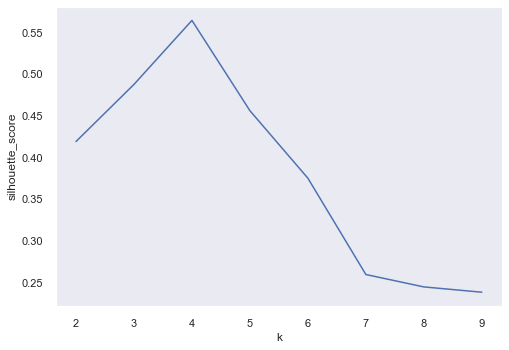

In [182]:

sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.grid()

k=4 KMeans algorithm  is selected from above plot

[('euclidean', 'single'), ('euclidean', 'complete'), ('euclidean', 'average'), ('euclidean', 'ward'), ('chebyshev', 'single'), ('chebyshev', 'complete'), ('chebyshev', 'average'), ('euclidean', 'ward'), ('cityblock', 'single'), ('cityblock', 'complete'), ('cityblock', 'average'), ('euclidean', 'ward')]
{('euclidean', 'single'): 0.3914216467215974, ('euclidean', 'complete'): 0.5628975612677791, ('euclidean', 'average'): 0.5632436172320862, ('euclidean', 'ward'): 0.5632436172320862, ('chebyshev', 'single'): 0.3914216467215974, ('chebyshev', 'complete'): 0.38671772116012404, ('chebyshev', 'average'): 0.3914216467215974, ('cityblock', 'single'): 0.3914216467215974, ('cityblock', 'complete'): 0.5628975612677791, ('cityblock', 'average'): 0.5632436172320862}


Text(0, 0.5, 'silhouette_score')

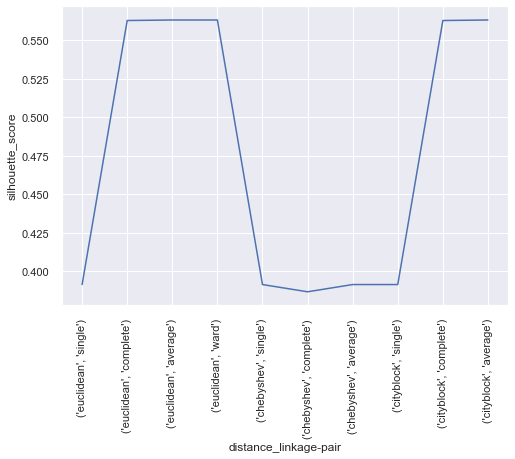

In [285]:
#Trying with n_clusters=4


HCcluster_list = []
HCsil_score ={}


dist_metrics = ['euclidean','chebyshev','cityblock']
link_methods = ['single', 'complete', 'average','ward']
for dm in range(len(dist_metrics)):
    for lm in range(len(link_methods)):
        HCcluster_pair=()
        if(link_methods[lm]=='ward'):
            HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage=link_methods[lm])
            HCcluster_pair = ('euclidean',link_methods[lm])
            HCcluster_list.append(('euclidean',link_methods[lm]))
        else:
            HCmodel = AgglomerativeClustering(n_clusters=4,affinity=dist_metrics[dm], linkage=link_methods[lm])
            HCcluster_list.append((dist_metrics[dm],link_methods[lm]))
            HCcluster_pair = (dist_metrics[dm],link_methods[lm])
        HCpreds = HCmodel.fit_predict(subset_scaled_df)
        HCscore = silhouette_score(subset_scaled_df, HCpreds)
        HCsil_score[HCcluster_pair] = HCscore

print(HCcluster_list)
print(HCsil_score)
HCsil_score
HCsil_pdf = pd.DataFrame(list(HCsil_score.items()),columns=['dist_link_pair','Sil_score'])
HCsil_pdf
plt.plot(HCsil_pdf['dist_link_pair'].astype(str),HCsil_pdf['Sil_score'])
plt.xticks(rotation=90)
plt.xlabel('distance_linkage-pair')
plt.ylabel('silhouette_score')
#plt.grid()        
        


In [287]:
HCsil_pdf.sort_values('Sil_score',ascending = False)  # sort values in descending order of Silhouette score
HCsil_pdf.head(50)
# Add number of data points in each cluster as a column to kMeans_cluster_profile dataframe
kMeans_cluster_profile['cluster_wise_total_counts']= data.groupby('K_means_segments')['Total_Credit_Cards'].count().values

,dist_link_pair,Sil_score
0,"(euclidean, single)",0.391422
1,"(euclidean, complete)",0.562898
2,"(euclidean, average)",0.563244
3,"(euclidean, ward)",0.563244
4,"(chebyshev, single)",0.391422
5,"(chebyshev, complete)",0.386718
6,"(chebyshev, average)",0.391422
7,"(cityblock, single)",0.391422
8,"(cityblock, complete)",0.562898
9,"(cityblock, average)",0.563244
